# <div style="text-align: center;">PROJET DE FIN DE MODULE FINAL PYTHON</div>

## Description du projet
Ce projet est un ancien concours organisé par Kaggle dont le problème était de construire un modèle de probabilité de défaut qui prédit si un individu sera en défaut de paiement dans les deux prochaines années en fonction des caractéristiques financières et personnelles fournies. 

## Description du jeu de données
Le jeu de données contient les colonnes suivantes:

- **ID**: Identifiant unique des individus.
<br> <br>
- **SeriousDlqin2yrs**: Indicateur binaire qui indique si la personne a connu un retard de paiement de 90 jours ou plus
<br> <br>
- **RevolvingUtilizationOfUnsecuredLines**: Solde total des cartes de crédit et des marges de crédit personnelles, à l'exception des dettes immobilières et des dettes sans versements, comme les prêts automobiles, divisé par la somme des limites de crédit
<br> <br>
- **age**: Âge de l'emprunteur en années.
<br> <br>
- **NumberOfTime30-59DaysPastDueNotWorse**: Nombre de fois où l'emprunteur a eu 30 à 59 jours de retard de paiement, mais pas plus au cours des 2 dernières années.
<br> <br>
- **DebtRatio**: Paiements mensuels de la dette, pension alimentaire, frais de subsistance divisés par le revenu brut mensuel.
<br> <br>
- **MonthlyIncome**: Revenu mensuel. 
<br> <br>
- **NumberOfOpenCreditLinesAndLoans**: Nombre de prêts ouverts (à tempérament comme un prêt automobile ou un prêt hypothécaire) et de lignes de crédit (par exemple, des cartes de crédit).
<br> <br>
- **NumberOfTimes90DaysLate**: Nombre de fois où l'emprunteur a eu 90 jours ou plus de retard de paiement.
<br> <br>
- **NumberRealEstateLoansOrLines**: Nombre de prêts hypothécaires et immobiliers, y compris les marges de crédit sur valeur domiciliaire.
<br> <br>
- **NumberOfTime60-89DaysPastDueNotWorse**: Nombre de fois où l'emprunteur a eu un retard de paiement de 60-89 jours, mais pas plus au cours des 2 dernières années.
<br> <br>
- **NumberOfDependents**: Nombre de personnes à charge dans la famille, excluant l'emprunteur (conjoint, enfants, etc.).

## Chargement des bibliothèques

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
%matplotlib inline

## Exploration des données

In [406]:
#Chargement des données 
data = pd.read_csv("cs-training.csv")
data.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [408]:
#Renommer la colonne "Unnamed: 0" en "ID" et créer une copie du DataFrame
data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
data_copie = data.copy()
data_copie.head()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [409]:
#Dimensions du jeu de données
data_copie.shape

(150000, 12)

**Le jeu de données contient 150000 lignes et 12 colonnes.**

In [410]:
#Les tyes de données des colonnes
data_copie.dtypes

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [411]:
#Vue d'ensemble des caracteristiques des colonnes
data_copie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## Nettoyage des données

In [412]:
#Les valeurs dupliquées
data_copie.duplicated().sum()

0

In [413]:
#Les valeurs manquantes
print(data_copie.isna().sum())
print("\n------------------------------------------------------------------\n")
print(((data_copie.isna().sum())/(len(data_copie)))*100)
print("\n------------------------------------------------------------------\n")
#Verification de la colonne MonthlyIncome
print("Nombre de lignes avec des valeurs egal à zero dans la colonne MonthlyIncome: {}.".format(len(data_copie[data_copie["MonthlyIncome"]<100])))

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

------------------------------------------------------------------

ID                                       0.000000
SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCred

On remarque 29731 (soit 19,82%) valeurs manquantes dans la colonne *MonthlyIncome* et 3924 (soit 2.61%) valeurs manquantes dans la colonne *NumberOfDependents*. De plus, dans la colonne *MonthlyIncome*, on a 2277 lignes où la valeur est inférieur à 100. <br>
**Par la suite, nous allons procéder à la gestion des valeurs manquantes avec divers techniques.**

In [414]:
#Remplacement des valeurs inférieures à 100 par la mediane
med_income = data_copie[data_copie["MonthlyIncome"] > 100]["MonthlyIncome"].median()
data_copie.loc[data_copie['MonthlyIncome'] < 100, 'MonthlyIncome'] = med_income
print(len(data_copie[data_copie["MonthlyIncome"]<100]))

0


In [415]:
#Traitement des valeurs manquantes
data_copie['MonthlyIncome'].fillna(med_income, inplace=True)
mode_dep = data_copie['NumberOfDependents'].mode()[0]
data_copie['NumberOfDependents'].fillna(mode_dep, inplace=True)

In [416]:
#Verification des modifications
data_copie.info()
print("\n------------------------------------------------------------------\n")
data_copie.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Traitement des valeurs aberrantes colonne par colonne

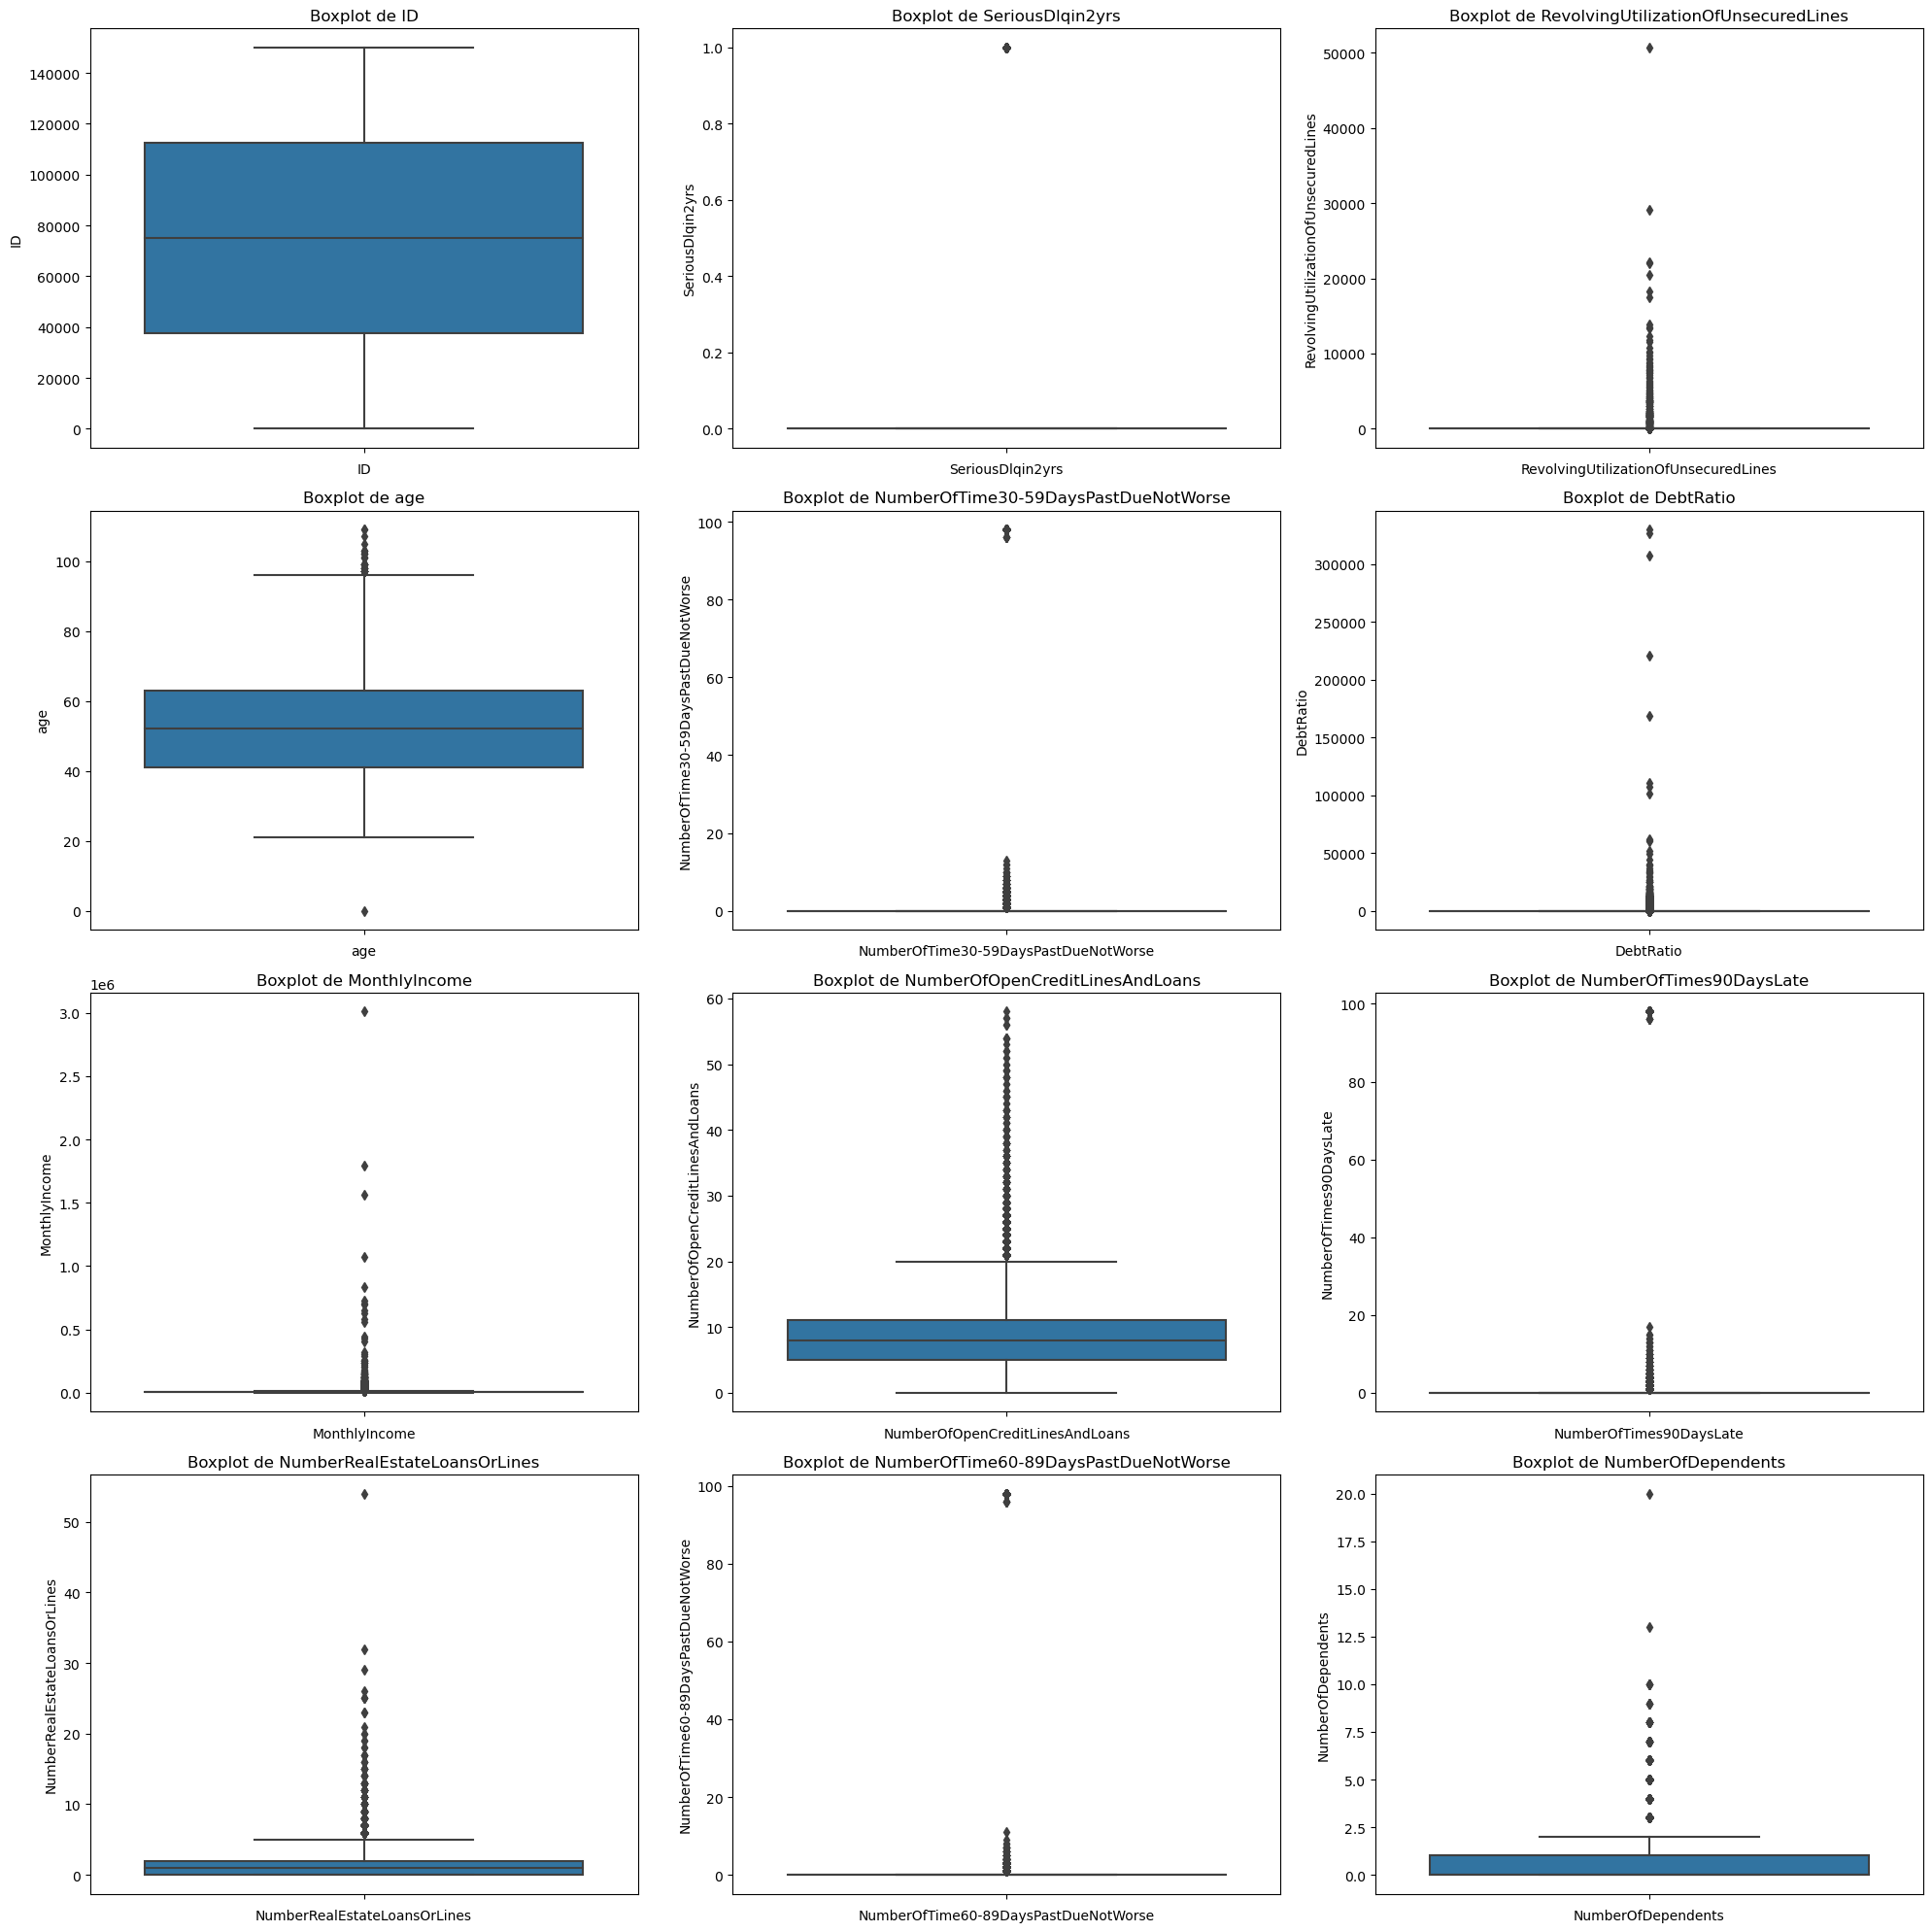

In [417]:
#Visualisation avant nettoyage
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
cols = data_copie.columns
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=data_copie[col], ax=axes[i])
    axes[i].set_title("Boxplot de {}".format(col))
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

### RevolvingUtilizationOfUnsecuredLines

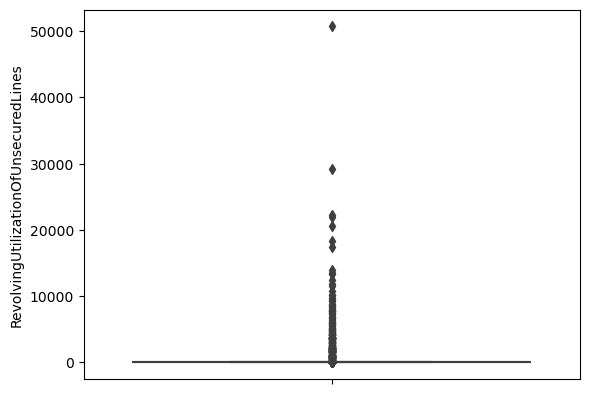

In [418]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["RevolvingUtilizationOfUnsecuredLines"])
plt.show()

In [420]:
len(data_copie[data_copie["RevolvingUtilizationOfUnsecuredLines"]>2])

371

On observe des valeurs extrêmes, nous allons donc fixer un seuil et remplacer les valeurs superieurs à ce seuil par la mediane.

In [421]:
#Application de la correction 
med_rev = data_copie[data_copie['RevolvingUtilizationOfUnsecuredLines'] <= 2]['RevolvingUtilizationOfUnsecuredLines'].median()
data_copie.loc[data_copie['RevolvingUtilizationOfUnsecuredLines'] > 2, 'RevolvingUtilizationOfUnsecuredLines'] = med_rev

In [422]:
len(data_copie[data_copie["RevolvingUtilizationOfUnsecuredLines"]>2])

0

### age

In [423]:
#Correction de la colonne age
print(len(data_copie[data_copie['age']==0]))
med_age = data_copie[data_copie['age'] !=0]['age'].median()
data_copie['age'] = data_copie['age'].apply(lambda x: med_age if x == 0 or x > 100 else x)
print(len(data_copie[data_copie['age']==0]))

1
0


### NumberOfTime30-59DaysPastDueNotWorse

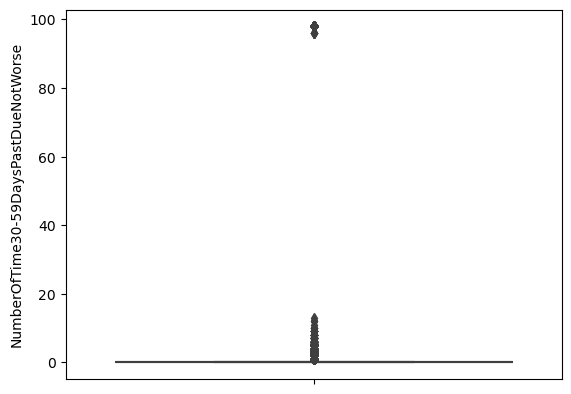

In [424]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberOfTime30-59DaysPastDueNotWorse"])
plt.show()

In [425]:
print(sorted(data_copie["NumberOfTime30-59DaysPastDueNotWorse"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberOfTime30-59DaysPastDueNotWorse"]>=96]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

On observe des valeurs extrêmes, nous allons donc fixer un seuil et remplacer les valeurs superieurs à ce seuil par la mediane.

In [426]:
#Application de la correction 
med_nb1 = data_copie[data_copie['NumberOfTime30-59DaysPastDueNotWorse'] <= 96]['NumberOfTime30-59DaysPastDueNotWorse'].median()
data_copie.loc[data_copie['NumberOfTime30-59DaysPastDueNotWorse'] >= 96, 'NumberOfTime30-59DaysPastDueNotWorse'] = int(med_nb1)

In [427]:
len(data_copie[data_copie["NumberOfTime30-59DaysPastDueNotWorse"]>=96])

0

### DebtRatio

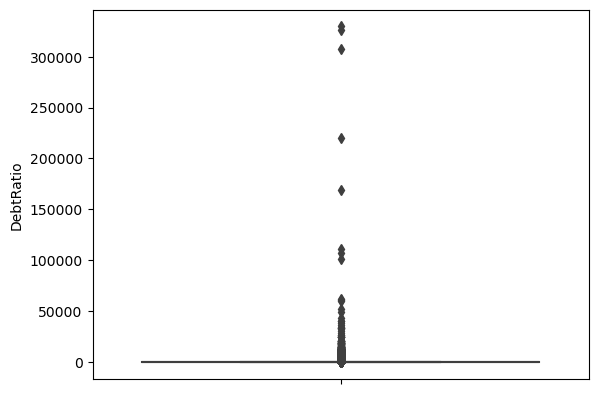

In [428]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["DebtRatio"])
plt.show()

In [429]:
print(sorted(data_copie["DebtRatio"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["DebtRatio"]>2]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

On observe des valeurs extrêmes, nous allons donc fixer un seuil et remplacer les valeurs superieurs à ce seuil par la mediane.

In [430]:
#Application de la correction 
med_dr = data_copie[data_copie['DebtRatio'] < 2]['DebtRatio'].median()
data_copie.loc[data_copie['DebtRatio'] > 2, 'DebtRatio'] = med_dr

In [431]:
len(data_copie[data_copie["DebtRatio"]>2])

0

### MonthlyIncome

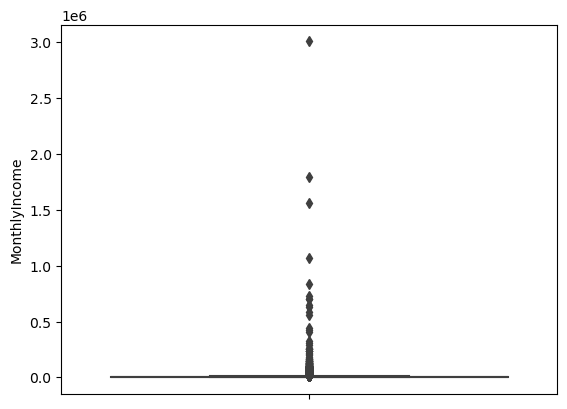

In [432]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["MonthlyIncome"])
plt.show()

In [433]:
print(sorted(data_copie['MonthlyIncome']))

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 101.0, 105.0, 107.0, 115.0, 120.0, 124.0, 125.0, 125.0, 126.0, 135.0, 135.0, 140.0, 140.0, 147.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 151.0, 151.0, 151.0, 160.0, 166.0, 167.0, 170.0, 170.0, 179.0, 179.0, 180.0, 181.0, 183.0, 189.0, 189.0, 192.0, 197.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 201.0, 201.0, 201.0, 201.0, 220.0, 221.0, 225.0, 228.0, 236.0, 236.0, 237.0, 240.0, 240.0, 242.0, 248.0, 248.0, 249.0, 249.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 251.0, 254.0, 254.0

In [434]:
Q1 = data_copie['MonthlyIncome'].quantile(0.25)  
Q3 = data_copie['MonthlyIncome'].quantile(0.75)  
IQR = Q3 - Q1  
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
med_inc = data_copie['MonthlyIncome'].median()
data_copie['MonthlyIncome'] = data_copie['MonthlyIncome'].apply(
    lambda x: med_inc if x > upper_limit or x < lower_limit else x
)

### NumberOfOpenCreditLinesAndLoans

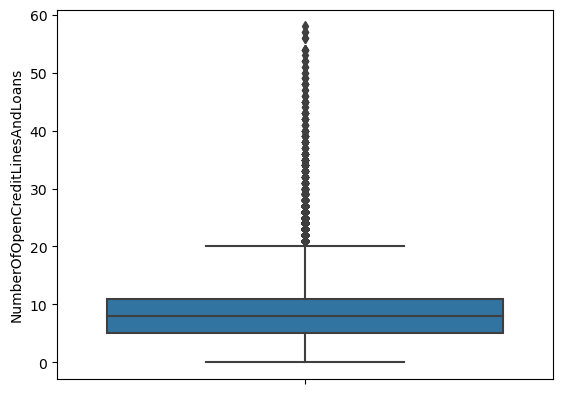

In [435]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberOfOpenCreditLinesAndLoans"])
plt.show()

In [436]:
print(sorted(data_copie["NumberOfOpenCreditLinesAndLoans"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberOfOpenCreditLinesAndLoans"]>30]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [437]:
#Application de la correction 
med_nbocr = data_copie[data_copie['NumberOfOpenCreditLinesAndLoans'] < 30]['NumberOfOpenCreditLinesAndLoans'].median()
data_copie.loc[data_copie['NumberOfOpenCreditLinesAndLoans'] > 30, 'NumberOfOpenCreditLinesAndLoans'] = int(med_nbocr)

In [438]:
len(data_copie[data_copie["NumberOfOpenCreditLinesAndLoans"]>30])

0

### NumberOfTimes90DaysLate

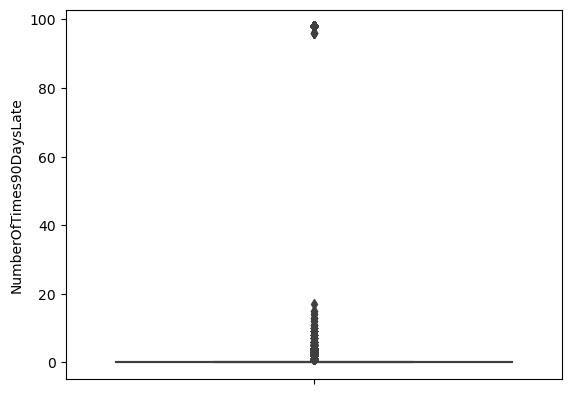

In [439]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberOfTimes90DaysLate"])
plt.show()

In [440]:
print(sorted(data_copie["NumberOfTimes90DaysLate"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberOfTimes90DaysLate"]>15]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [441]:
#Application de la correction 
med_lt = data_copie[data_copie['NumberOfTimes90DaysLate'] < 15]['NumberOfTimes90DaysLate'].median()
data_copie.loc[data_copie['NumberOfTimes90DaysLate'] > 15, 'NumberOfTimes90DaysLate'] = int(med_lt)

In [442]:
len(data_copie[data_copie["NumberOfTimes90DaysLate"]>15])

0

### NumberRealEstateLoansOrLines

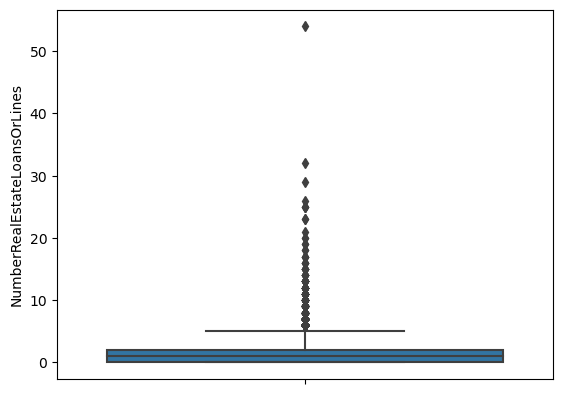

In [443]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberRealEstateLoansOrLines"])
plt.show()

In [444]:
print(sorted(data_copie["NumberRealEstateLoansOrLines"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberRealEstateLoansOrLines"]>10]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [445]:
#Application de la correction 
med_res = data_copie[data_copie['NumberRealEstateLoansOrLines'] < 10]['NumberRealEstateLoansOrLines'].median()
data_copie.loc[data_copie['NumberRealEstateLoansOrLines'] > 10, 'NumberRealEstateLoansOrLines'] = int(med_res)

In [446]:
len(data_copie[data_copie["NumberRealEstateLoansOrLines"]>10])

0

### NumberOfTime60-89DaysPastDueNotWorse

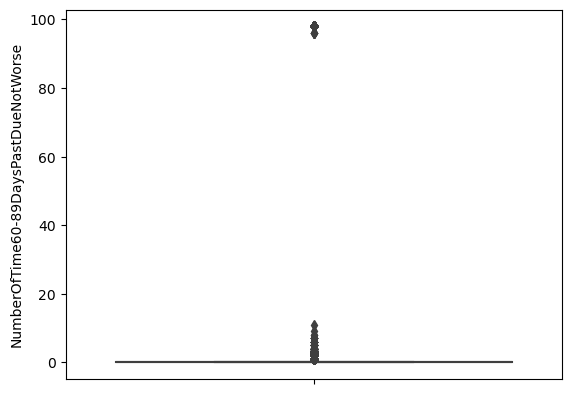

In [447]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberOfTime60-89DaysPastDueNotWorse"])
plt.show()

In [448]:
print(sorted(data_copie["NumberOfTime60-89DaysPastDueNotWorse"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberOfTime60-89DaysPastDueNotWorse"]>=96]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [449]:
#Application de la correction 
med_2 = data_copie[data_copie['NumberOfTime60-89DaysPastDueNotWorse'] < 96]['NumberOfTime60-89DaysPastDueNotWorse'].median()
data_copie.loc[data_copie['NumberOfTime60-89DaysPastDueNotWorse'] >= 96, 'NumberOfTime60-89DaysPastDueNotWorse'] = int(med_2)

In [450]:
len(data_copie[data_copie["NumberOfTime60-89DaysPastDueNotWorse"]>=96])

0

### NumberOfDependents

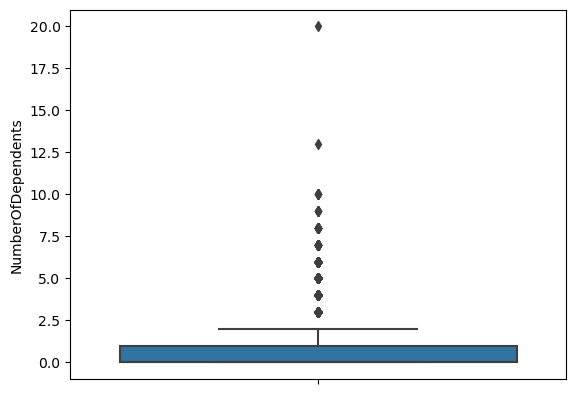

In [451]:
#Visualisation du boxplot
sns.boxplot(y=data_copie["NumberOfDependents"])
plt.show()

In [452]:
print(sorted(data_copie["NumberOfDependents"]))
print("\n-------------------------------------------------------------\n")
print(len(data_copie[data_copie["NumberOfDependents"]>10]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [453]:
#Application de la correction 
med_dp = data_copie[data_copie['NumberOfDependents'] < 10]['NumberOfDependents'].median()
data_copie.loc[data_copie['NumberOfDependents'] > 10, 'NumberOfDependents'] = int(med_dp)

In [454]:
len(data_copie[data_copie["NumberOfDependents"]>10])

0

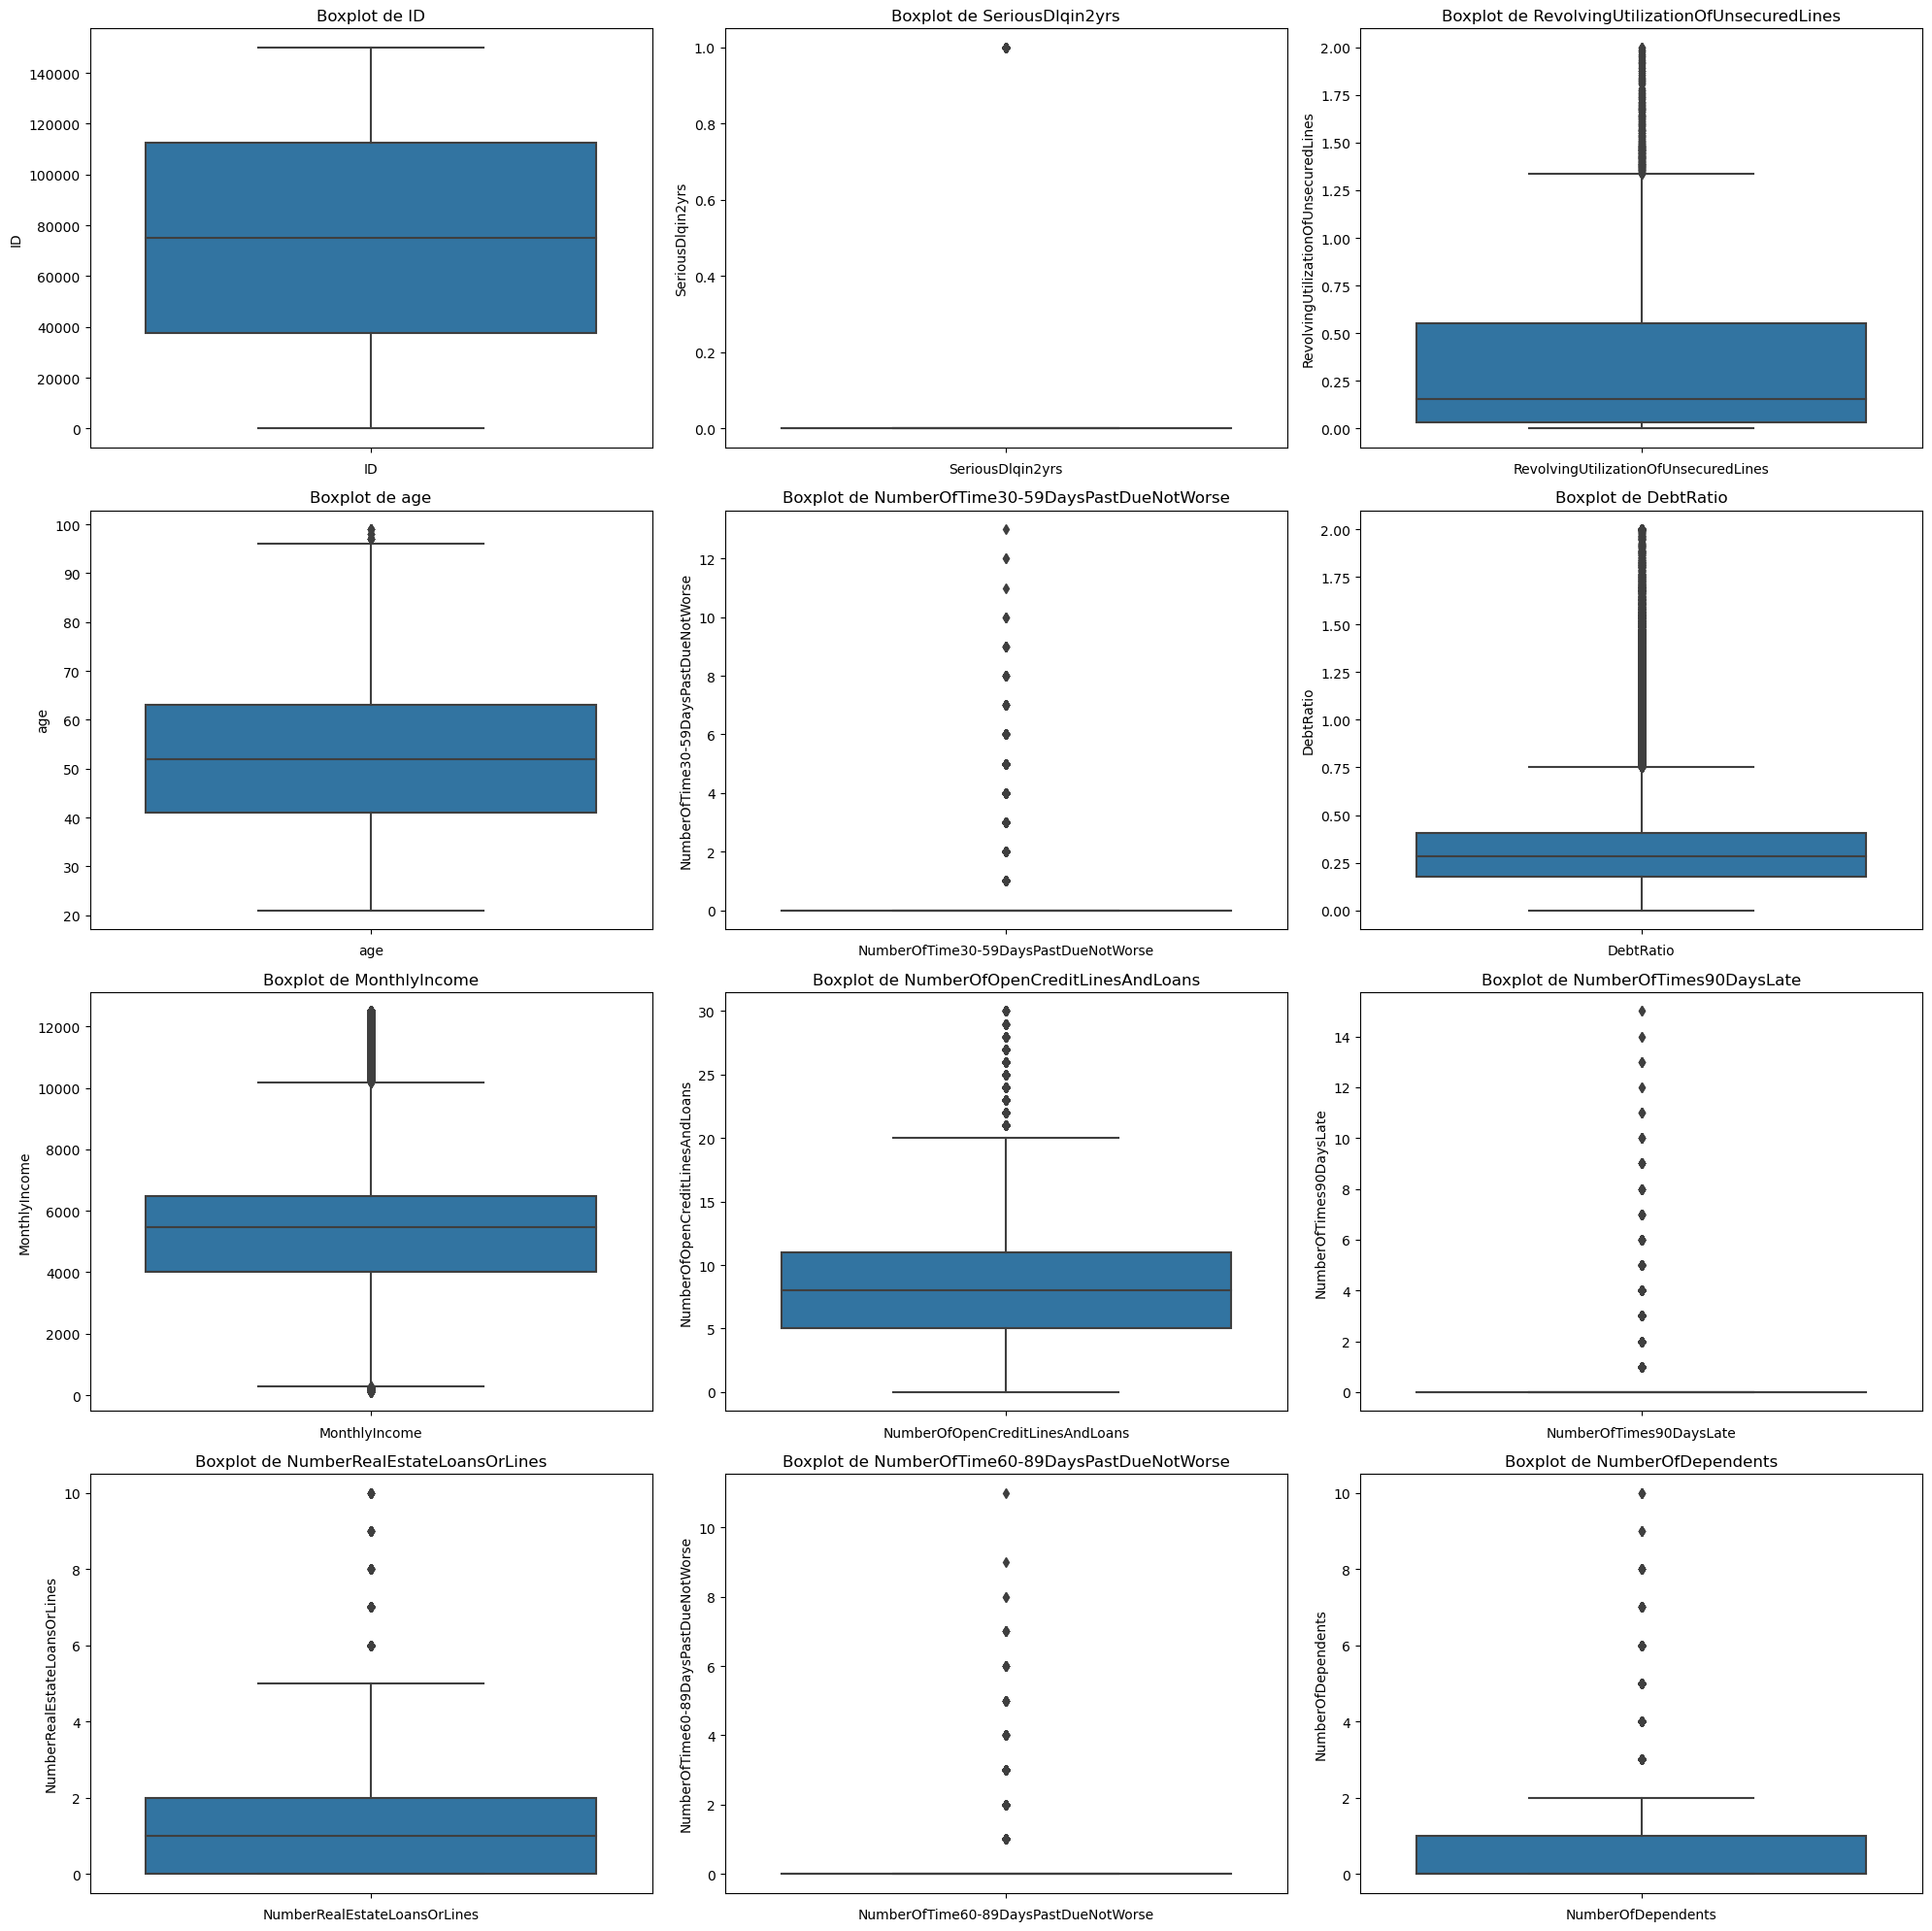

In [455]:
#Visualisation après nettoyage
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
cols = data_copie.columns
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(y=data_copie[col], ax=axes[i])
    axes[i].set_title("Boxplot de {}".format(col))
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

## Visualisation des données

In [456]:
colonnes = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64

--------------------------------------------------------------



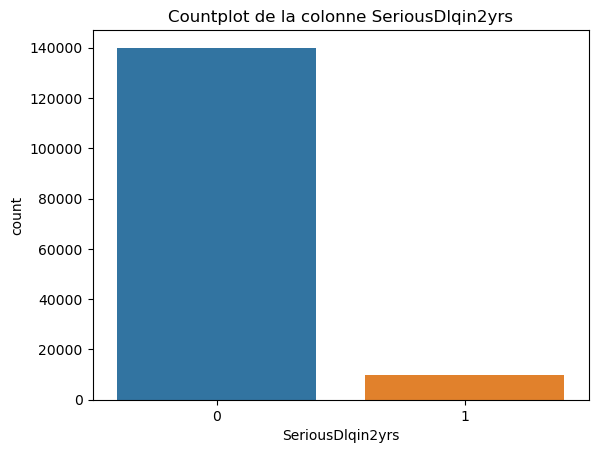

In [457]:
#Visualisation sous forme de pourcentage
print(data_copie["SeriousDlqin2yrs"].value_counts(normalize=True) * 100) 
print("\n--------------------------------------------------------------\n")
#Visualization du countplot de la colonne SeriousDlqin2yrs
sns.countplot(x=data_copie["SeriousDlqin2yrs"])
plt.title("Countplot de la colonne SeriousDlqin2yrs")
plt.show()

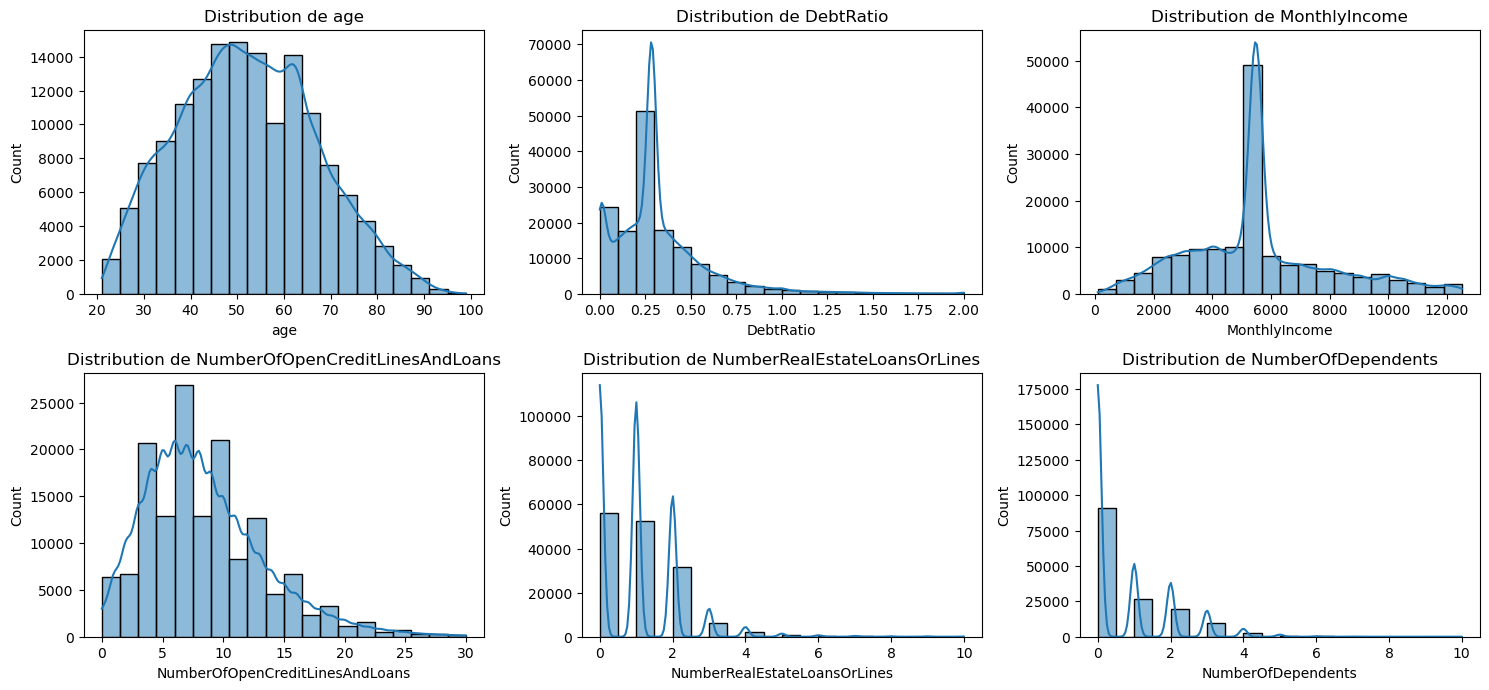

In [458]:
#Visualisations des distributions de quelques colonnes
dist_cols = ['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
                   'NumberRealEstateLoansOrLines', 'NumberOfDependents']
plt.figure(figsize=(15, 10))
for i, col in enumerate(dist_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_copie[col], kde=True, bins=20)
    plt.title("Distribution de {}".format(col))
plt.tight_layout()
plt.show()

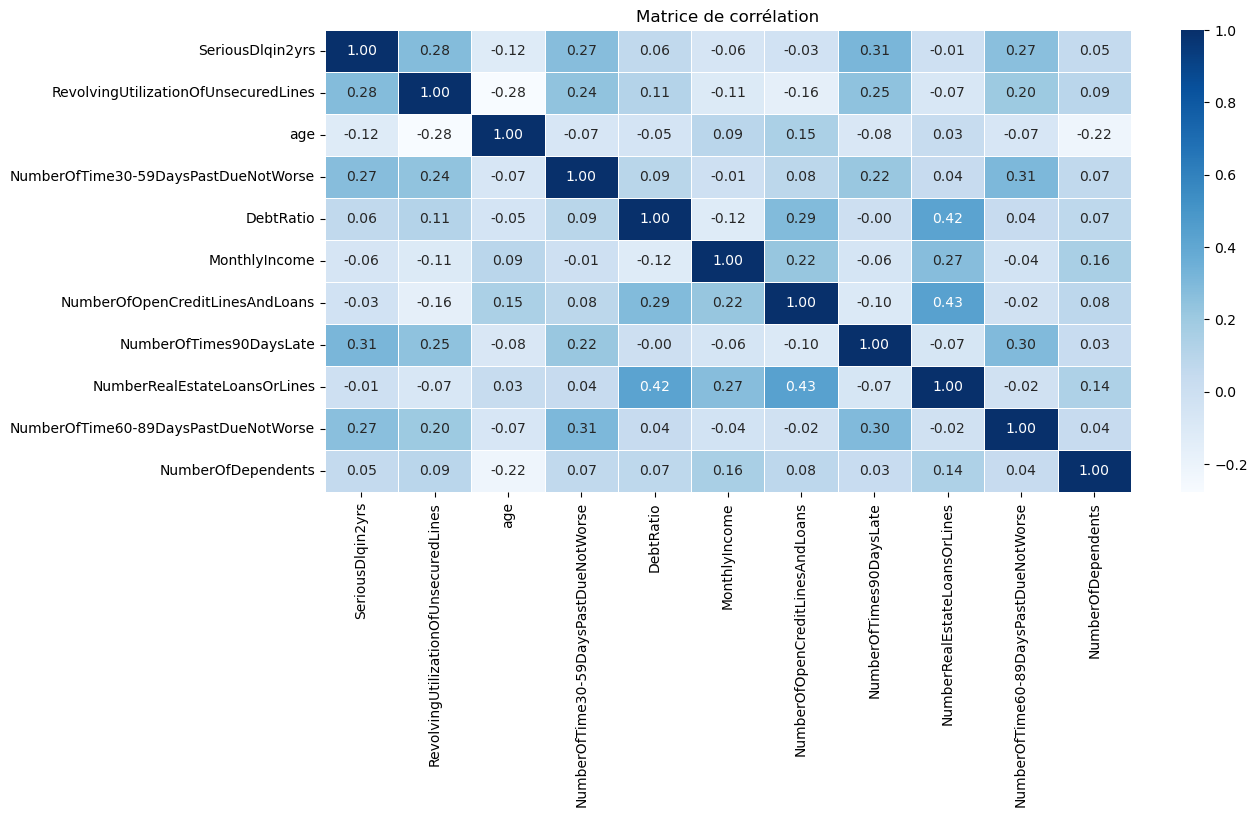

In [459]:
#Representation de la matrice de corrélation
corr_matrix = data_copie[colonnes].corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [460]:
#Calcul et affichage des corrélations avec la variable cible
target = "SeriousDlqin2yrs"
exclu = ["ID","SeriousDlqin2yrs"]
corr_cols = [col for col in data_copie.columns if col not in exclu]  
for col in corr_cols:
    correlation = data_copie[col].corr(data_copie[target])
    print(f"La corrélation entre '{col}' et '{target}' est : {correlation:.4f}\n")

La corrélation entre 'RevolvingUtilizationOfUnsecuredLines' et 'SeriousDlqin2yrs' est : 0.2842

La corrélation entre 'age' et 'SeriousDlqin2yrs' est : -0.1155

La corrélation entre 'NumberOfTime30-59DaysPastDueNotWorse' et 'SeriousDlqin2yrs' est : 0.2714

La corrélation entre 'DebtRatio' et 'SeriousDlqin2yrs' est : 0.0628

La corrélation entre 'MonthlyIncome' et 'SeriousDlqin2yrs' est : -0.0608

La corrélation entre 'NumberOfOpenCreditLinesAndLoans' et 'SeriousDlqin2yrs' est : -0.0315

La corrélation entre 'NumberOfTimes90DaysLate' et 'SeriousDlqin2yrs' est : 0.3121

La corrélation entre 'NumberRealEstateLoansOrLines' et 'SeriousDlqin2yrs' est : -0.0126

La corrélation entre 'NumberOfTime60-89DaysPastDueNotWorse' et 'SeriousDlqin2yrs' est : 0.2656

La corrélation entre 'NumberOfDependents' et 'SeriousDlqin2yrs' est : 0.0470



## Modélisation

In [461]:
#Donnée pour la modelisation
df = data_copie.copy()
df.head()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0   1                 1                              0.766127  45.0   
1   2                 0                              0.957151  40.0   
2   3                 0                              0.658180  38.0   
3   4                 0                              0.233810  30.0   
4   5                 0                              0.907239  49.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926         5483.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [462]:
#Repartition des colonnes independantes et dépendantes
independent_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
                    'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                    'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                    'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                    'NumberOfDependents']
dependent_col = 'SeriousDlqin2yrs'
#Définition des variables cibles et prédictives
X = df[independent_cols]
y = df[dependent_col]
#Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [463]:
X_train.head()

RevolvingUtilizationOfUnsecuredLines   age  \
36793                               0.012986  70.0   
72560                               0.852115  59.0   
3547                                0.817085  58.0   
141945                              0.070328  40.0   
19039                               0.311569  40.0   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
36793                                      0   0.206890        11000.0   
72560                                      3   0.969077         6790.0   
3547                                       1   0.194561         5000.0   
141945                                     0   0.548801         6003.0   
19039                                      3   0.740104         2500.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
36793                                 8                        0   
72560                                19                        6   
3547                                  6                        0   
141945                               10                        0   
19039                                 4                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
36793                              1                                     0   
72560                              2                                     1   
3547                               0                                     0   
141945                             2                                     0   
19039                              1                                     0   

        NumberOfDependents  
36793                  1.0  
72560                  0.0  
3547                   0.0  
141945                 3.0  
19039                  4.0

In [464]:
X_test.head()

RevolvingUtilizationOfUnsecuredLines   age  \
83750                              0.033812  50.0   
58302                              1.042957  27.0   
11422                              0.055459  80.0   
91289                              0.083058  54.0   
49179                              0.036182  38.0   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
83750                                     0   0.328573        10992.0   
58302                                     0   0.288985         2532.0   
11422                                     0   0.004249         4000.0   
91289                                     0   0.089510         6300.0   
49179                                     1   0.624164         2540.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
83750                               11                        0   
58302                                4                        3   
11422                                1                        0   
91289                                6                        0   
49179                               10                        0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
83750                             3                                     0   
58302                             0                                     0   
11422                             0                                     0   
91289                             0                                     0   
49179                             1                                     0   

       NumberOfDependents  
83750                 0.0  
58302                 0.0  
11422                 0.0  
91289                 2.0  
49179                 2.0

In [465]:
y_train.head()

36793     0
72560     1
3547      0
141945    0
19039     1
Name: SeriousDlqin2yrs, dtype: int64

In [466]:
y_test.head()

83750    0
58302    0
11422    0
91289    0
49179    0
Name: SeriousDlqin2yrs, dtype: int64

### Modèle de regression logistique

In [467]:
#Modélisation
log_reg = LogisticRegression(random_state=20)
log_reg.fit(X_train, y_train)
y_pred_rl = log_reg.predict(X_test)
y_prob_rl = log_reg.predict_proba(X_test)[:, 1]  

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [468]:
#Évaluation des performances du modèle
acc_rl = accuracy_score(y_test, y_pred_rl)
prec_rl = precision_score(y_test, y_pred_rl)
rec_rl = recall_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl)
roc_auc_rl = roc_auc_score(y_test, y_prob_rl)

print("Évaluation des performances:")
print(f"Accuracy: {acc_rl:.4f}")
print(f"Precision: {prec_rl:.4f}")
print(f"Recall: {rec_rl:.4f}")
print(f"F1-Score: {f1_rl:.4f}")
print(f"ROC-AUC: {roc_auc_rl:.4f}")

Évaluation des performances:
Accuracy: 0.9355
Precision: 0.5622
Recall: 0.1534
F1-Score: 0.2410
ROC-AUC: 0.8076


In [477]:
#Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_rl))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41994
           1       0.56      0.15      0.24      3006

    accuracy                           0.94     45000
   macro avg       0.75      0.57      0.60     45000
weighted avg       0.92      0.94      0.92     45000



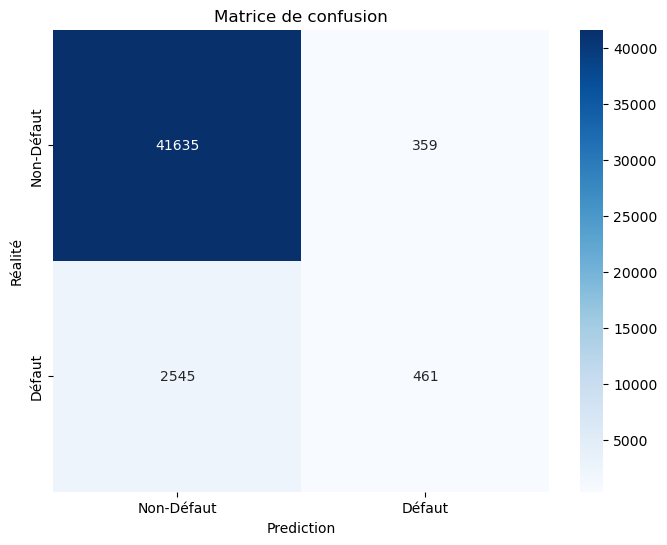

In [478]:
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rl)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Défaut', 'Défaut'], yticklabels=['Non-Défaut', 'Défaut'])
plt.xlabel("Prediction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion")
plt.show()

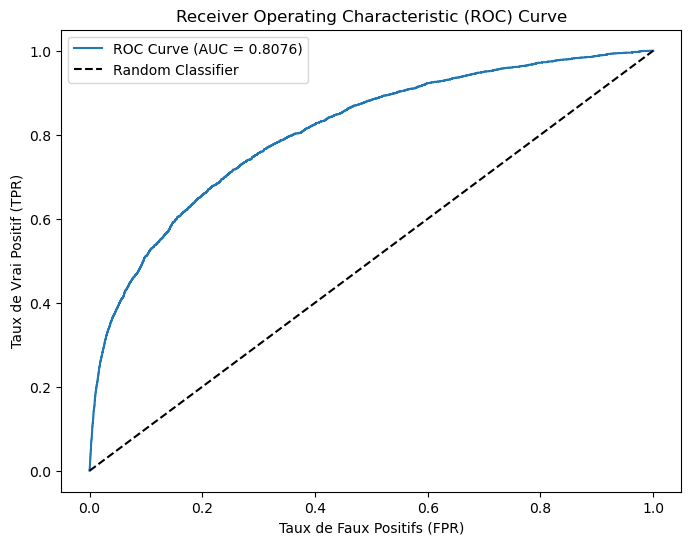

In [479]:
#Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rl)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rl:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrai Positif (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()

**Interpretation** <br>
1. Accuracy(0.9355): 
On a 93.55% des prédictions du modèle qui sont correctes, ce qui semble relativement bon. Cependant, l'accuracy seule peut être trompeuse.
2. Precision(0.5622): 
Cela signifie que 56.22% des prédictions positives du modèle sont réellement positives (le modèle fait des prédictions positives et parmi celles-ci, seulement 56.22% sont correctes). Pas très élevé.
3. Recall(0.1534) : 
Le recall de 15.34% signifie que le modèle ne détecte que 15.34% des vrais positifs parmi les exemples qui sont réellement positifs. C'est assez faible, ce qui signifie que le modèle rate beaucoup de cas où l'événement cible se produit.
4. F1-Score (0.2410): 
Le F1-Score est la moyenne harmonique entre la précision et le rappel. Un F1-score de 0.2410 indique que le modèle a un compromis relativement faible entre précision et rappel. Idéalement, on cherche à maximiser le F1-score, en équilibrant à la fois la précision et le rappel.
5. ROC-AUC (0.8076): 
Le ROC-AUC de 0.8076 indique que le modèle a une bonne capacité à distinguer entre les classes. Un score AUC plus proche de 1 signifie une très bonne performance en termes de discrimination entre les classes positives et négatives.
Un score de 0.8076 montre que ton modèle est relativement bon pour classer les exemples, mais il y a encore de la place pour l'amélioration.

### Modèle de forêt aléatoire

In [480]:
#Modélisation
rf_model = RandomForestClassifier(n_estimators=100, random_state=20, class_weight="balanced")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  

In [481]:
#Évaluation des performances du modèle
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=1)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Évaluation des performances:")
print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Évaluation des performances:
Accuracy: 0.9323
Precision: 0.4795
Recall: 0.1517
F1 Score: 0.2305
ROC AUC Score: 0.8287


In [482]:
#Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_rf))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     41994
           1       0.48      0.15      0.23      3006

    accuracy                           0.93     45000
   macro avg       0.71      0.57      0.60     45000
weighted avg       0.91      0.93      0.92     45000



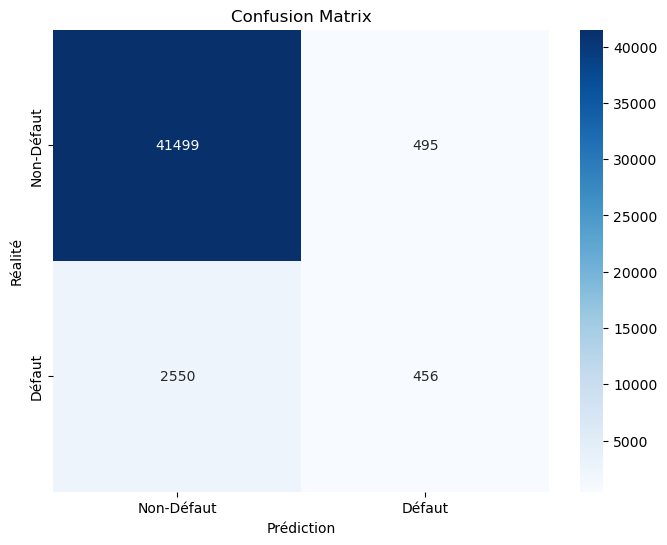

In [483]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Défaut', 'Défaut'], yticklabels=['Non-Défaut', 'Défaut'])
plt.title("Confusion Matrix")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

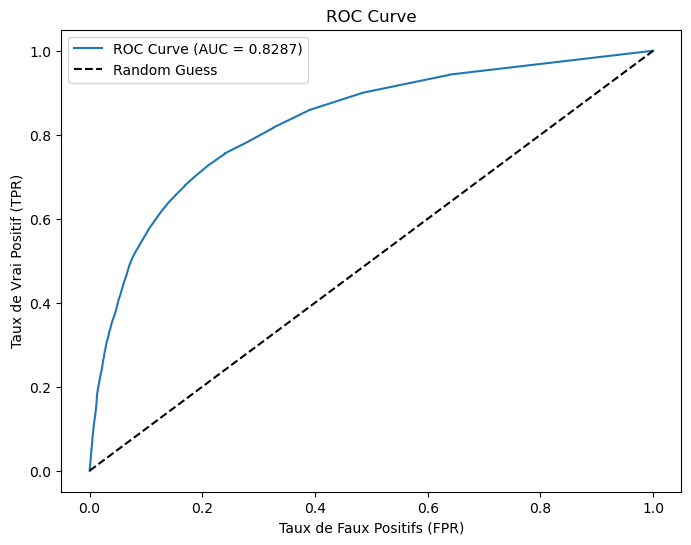

In [484]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrai Positif (TPR)")
plt.legend(loc="best")
plt.show()

**Interpretation** <br>
1. Accuracy (0.9323):
L'accuracy mesure le pourcentage des prédictions correctes sur l'ensemble des classes.
Une accuracy élevée comme 93.23 % peut sembler satisfaisante à première vue mais elle peut aussi être trompeuse.
2. Precision (0.4795):
La précision mesure le pourcentage des prédictions positives correctes parmi toutes les prédictions positives.
Ici, seulement 47.95 % des prédictions positives sont correctes. La faible précision indique que le modèle génère beaucoup de faux positifs, c'est-à-dire qu'il classe des instances comme positives alors qu'elles ne le sont pas.
3. Recall (0.1517):
Le rappel mesure le pourcentage des cas positifs correctement prédits parmi tous les cas réellement positifs. Ici, seulement 15.17 % des instances positives réelles sont détectées. Le faible rappel montre que le modèle a du mal à identifier correctement la classe positive (classe minoritaire).
4. F1 Score (0.2305):
Le F1 Score est la moyenne harmonique entre la précision et le rappel, offrant un équilibre entre les deux.
Ici, le F1 Score de 23.05 % reflète un compromis médiocre entre précision et rappel. Le modèle est globalement inefficace pour la classe positive, en dépit d'une accuracy élevée.
5. ROC AUC Score (0.8287): 
Le ROC AUC Score mesure la capacité du modèle à distinguer les classes positives et négatives à différents seuils. Un score de 0.8287 indique que le modèle est globalement bon pour discriminer les classes dans l'ensemble. Ce score est encourageant, mais il ne reflète pas toujours la performance sur des classes déséquilibrées, car il n’est pas directement influencé par le déséquilibre de la distribution des classes.

### Moèle XGBoost

In [485]:
#Modélisation
xgb_model = XGBClassifier(
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=6,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_x = xgb_model.predict(X_test)
y_proba_x = xgb_model.predict_proba(X_test)[:, 1]

In [486]:
#Évaluation des performances du modèle
acc_x = accuracy_score(y_test, y_pred_x)
prec_x = precision_score(y_test, y_pred_x)
rec_x = recall_score(y_test, y_pred_x)
f1_x = f1_score(y_test, y_pred_x)
roc_auc_x = roc_auc_score(y_test, y_proba_x)

print("Évaluation des performances:")
print(f"Accuracy: {acc_x:.4f}")
print(f"Precision: {prec_x:.4f}")
print(f"Recall: {rec_x:.4f}")
print(f"F1 Score: {f1_x:.4f}")
print(f"ROC-AUC Score: {roc_auc_x:.4f}")

Évaluation des performances:
Accuracy: 0.9364
Precision: 0.5766
Recall: 0.1790
F1 Score: 0.2732
ROC-AUC Score: 0.8596


In [487]:
#Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_x))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41994
           1       0.58      0.18      0.27      3006

    accuracy                           0.94     45000
   macro avg       0.76      0.58      0.62     45000
weighted avg       0.92      0.94      0.92     45000



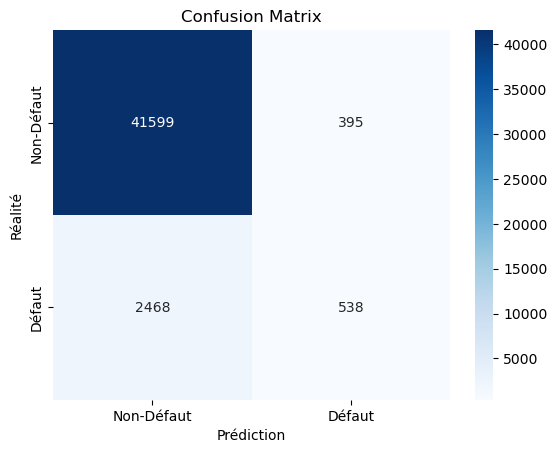

In [488]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_x)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Défaut', 'Défaut'], yticklabels=['Non-Défaut', 'Défaut'])
plt.title("Confusion Matrix")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

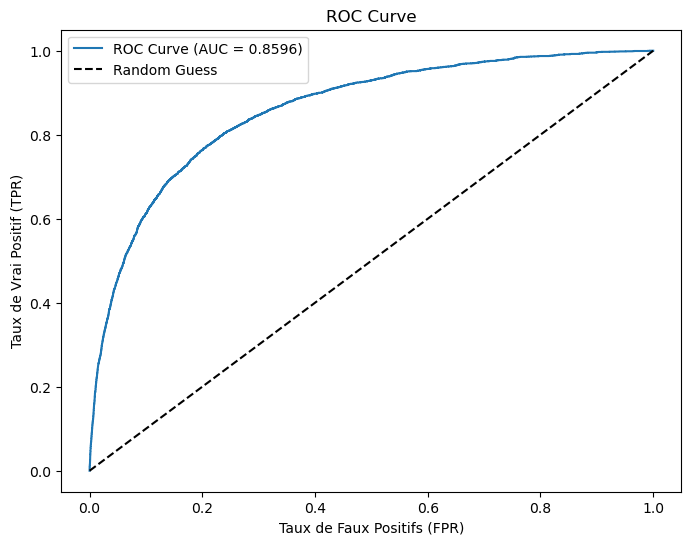

In [489]:
#Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_x)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_x:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrai Positif (TPR)")
plt.legend(loc="best")
plt.show()

**Interpretation** <br>
1. Accuracy (0.9364): 
Cela signifie que le modèle a correctement classé 93.64% des échantillons, ce qui semble très élevé. Cependant, l'accuracy seule peut être trompeuse dans les cas de déséquilibre de classes. Il faut donc examiner les autres métriques pour mieux comprendre les performances du modèle.
2. Precision (0.5766): 
La précision est de 57.66%, ce qui signifie que parmi les prédictions positives, le modèle a prédit 57.66% qui étaient réellement des cas positifs. Cela indique que, bien que le modèle ait un taux d'accuracy élevé, il pourrait prédire trop de faux positifs.
3. Recall (0.1790):
Le rappel est de 17.90%, ce qui signifie que parmi les réels cas positifs (les personnes ayant effectivement un risque de défaut), seulement 17.90% ont été correctement identifiés par le modèle. Un faible rappel indique que le modèle a du mal à détecter les cas positifs. C’est une faiblesse importante, en particulier pour des applications sensibles comme la prédiction des défauts de paiement, où il est crucial de minimiser les faux négatifs.
4. F1 Score (0.2732): 
Le F1 Score est une moyenne harmonique entre la précision et le rappel, et ici il est relativement faible. Cela reflète un compromis entre ces deux métriques, suggérant que le modèle n'est pas particulièrement performant à équilibrer la détection des cas positifs tout en maintenant la précision.
5. ROC-AUC Score (0.8596): 
Le score ROC-AUC de 0.8596 est assez bon. Cela signifie que le modèle a une bonne capacité à distinguer entre les classes positives et négatives. Le modèle est donc capable de trier correctement les individus ayant un risque élevé de défaut par rapport à ceux ayant un faible risque. Un score AUC supérieur à 0.8 est généralement considéré comme bon, bien que plus c'est proche de 1, mieux c'est.

In [491]:
#Enregistrement du modèle
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']

## Conclusion

Nous arrivons à la fin de notre projet, qui avait pour objectif de développer un modèle prédictif visant à estimer la probabilité qu'un individu sera en défaut de paiement dans les deux prochaines années en fonction des caractéristiques financières et personnelles fournies. Le processus a comporté plusieurs étapes, à savoir une analyse exploratoire approfondie, le nettoyage du dataset, puis la construction et l'évaluation de modèles prédictifs. Au total, nous avons testé trois modèles de classification pour prédire le risque de défaut de paiement des clients : la régression logistique, le Random Forest et XGBoost. Bien que tous les modèles aient affiché une bonne précision, ils ont tous montré des valeurs de rappel faibles, suggérant une difficulté à identifier les clients à risque. Cependant, le modèle XGBoost a obtenu les meilleurs résultats, avec un score AUC-ROC de 0.8596, surpassant les autres modèles en termes de performance et de précision. Bien que le faible rappel demeure un défi, XGBoost se distingue par sa robustesse et sa capacité à mieux séparer les classes. En conclusion, nous utiliserons le modèle XGBoost pour la suite du projet, en l'intégrant dans le développement d'une application web.